In [1]:
# Usei como base esse tutorial:
# https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/regression.ipynb#scrollTo=f-OHX4DiXd8x

In [2]:
# # # Clear logs
# # %rm -rf ./logs/

# # Ativação do Tensorboard
%conda activate pystock
%load_ext tensorboard

# # Reload Tensorboar
%reload_ext tensorboard



Note: you may need to restart the kernel to use updated packages.


# Sequential model

*Dense model 16*
*Dense model 16*
*Dense model 8*
*Dense model 4*
*Epoch 350*

_MSE: 1.31_
epoch: 350

Activation: softplus
Optimizer: Adam

15/15 - 0s - loss: 0.6325 - mae: 0.5830 - mse: 0.6325
Testing set Mean Abs Error:  0.58 ibova_0

In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers

# Lendo Dfs

In [4]:
PATH_TREINO = '../Data/3_Gold/Treino_all_stocks.csv'
DF_TREINO = pd.read_csv(PATH_TREINO, sep=",")

PATH_VALIDACAO = '../Data/3_Gold/Validacao_all_stocks.csv'
DF_VALIDACAO = pd.read_csv(PATH_VALIDACAO, sep=",")

PATH_TESTE = '../Data/3_Gold/Teste_all_stocks.csv'
DF_TESTE = pd.read_csv(PATH_TESTE, sep=",")

In [5]:
# index,
# ibova_0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,
# oil_0,oil_1,oil_2,oil_3,oil_4,oil_5,usd_0,
# usd_1,usd_2,usd_3,usd_4,usd_5,
# abev_0,abev_1,abev_2,abev_3,abev_4,abev_5,
# jbs_0,jbs_1,jbs_2,jbs_3,jbs_4,jbs_5,
# petr_0,petr_1,petr_2,petr_3,petr_4,petr_5,
# vale_0,vale_1,vale_2,vale_3,vale_4,vale_5

In [6]:
train_dataset = DF_TREINO
train_dataset = train_dataset.drop(['oil_0','usd_0','abev_0','jbs_0','petr_0','vale_0',], axis=1)
train_labels = train_dataset.pop('ibova_0')

test_dataset = DF_TESTE
test_dataset = test_dataset.drop(['oil_0','usd_0','abev_0','jbs_0','petr_0','vale_0',],axis=1)
test_labels = test_dataset.pop('ibova_0')

valid_dataset = DF_VALIDACAO
valid_dataset = valid_dataset.drop(['ibova_0','oil_0','usd_0','abev_0','jbs_0','petr_0','vale_0',],axis=1)
# valid_labels = valid_dataset.pop('ibova_0')

# Inspecionando os dados

In [7]:
# sns.pairplot(train_dataset[['index','ibova_0','ibova_1','ibova_2','ibova_3','ibova_4','oil_0','oil_1','oil_2','oil_3','oil_4','usd_0','usd_1','usd_2','usd_3','usd_4']], diag_kind="kde")
# sns.pairplot(train_dataset[['index','ibova_0','oil_0','usd_0']], diag_kind="kde")
# sns.pairplot(train_dataset[['ibova_1','oil_1','usd_1']], diag_kind="kde")

In [8]:
train_stats = train_dataset.describe()
# train_stats

# Definindo o modelo

In [9]:
# Diminuir quantidade de nós 
# Funcao logistica pra optimization
# Ver se relu funciona com RMSprop

# softplus melhor até agora
def build_model():
  model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='linear')
  ])

  # optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001,
                                       beta_1=0.9,
                                       beta_2=0.999,
                                       amsgrad=True)
  
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

# rmse pra avaliação, nao para loss


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1184      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 1,889
Trainable params: 1,889
Non-trainable params: 0
_________________________________________________________________


# Definindo Métricas

In [10]:
# Seguindo esse tutorial para extrair metricas para o tensorboard
# https://www.tensorflow.org/tensorboard/get_started?hl=pt


# Define metrics
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('test_accuracy')


# Para salvar os arquivos de log
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)



## Testando o modelo

In [11]:
example_batch = train_dataset[:10]
example_result = model.predict(example_batch)
# example_result

# Treinado o modelo

In [12]:
valid_dataset

,Unnamed: 0,ibova_1,ibova_2,ibova_3,ibova_4,ibova_5,oil_1,oil_2,oil_3,oil_4,...,petr_1,petr_2,petr_3,petr_4,petr_5,vale_1,vale_2,vale_3,vale_4,vale_5
0,0,0.455028,0.448165,0.245391,0.281350,0.466016,-0.931432,-1.067404,-1.285864,-1.194740,...,-0.431950,-0.099566,-0.014238,-0.064080,0.384725,-0.091428,-0.777854,-0.564906,-0.602899,-0.256620
1,1,0.448165,0.245391,0.281350,0.466016,0.481210,-1.067404,-1.285864,-1.194740,-0.916675,...,-0.099566,-0.014238,-0.064080,0.384725,0.532292,-0.777854,-0.564906,-0.602899,-0.256620,-0.584727
2,2,0.245391,0.281350,0.466016,0.481210,0.662616,-1.285864,-1.194740,-0.916675,-0.476092,...,-0.014238,-0.064080,0.384725,0.532292,1.320156,-0.564906,-0.602899,-0.256620,-0.584727,-0.399952
3,3,0.281350,0.466016,0.481210,0.662616,0.591181,-1.194740,-0.916675,-0.476092,-0.286186,...,-0.064080,0.384725,0.532292,1.320156,1.121795,-0.602899,-0.256620,-0.584727,-0.399952,-0.165347
4,4,0.466016,0.481210,0.662616,0.591181,0.435740,-0.916675,-0.476092,-0.286186,-0.113127,...,0.384725,0.532292,1.320156,1.121795,1.081789,-0.256620,-0.584727,-0.399952,-0.165347,0.011829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,467,0.139796,0.270228,0.073591,-0.012919,-0.263373,-0.521243,-0.510231,0.127780,-0.322491,...,-0.079006,0.089850,0.197493,-0.010751,-0.637970,0.036274,0.050765,0.144969,0.036189,-0.325592
468,468,0.270228,0.073591,-0.012919,-0.263373,-0.252110,-0.510231,0.127780,-0.322491,-0.380630,...,0.089850,0.197493,-0.010751,-0.637970,-0.667316,0.050765,0.144969,0.036189,-0.325592,-0.413764
469,469,0.073591,-0.012919,-0.263373,-0.252110,-0.138861,0.127780,-0.322491,-0.380630,-0.585283,...,0.197493,-0.010751,-0.637970,-0.667316,-0.798896,0.144969,0.036189,-0.325592,-0.413764,-0.539398
470,470,-0.012919,-0.263373,-0.252110,-0.138861,-0.179070,-0.322491,-0.380630,-0.585283,-0.333671,...,-0.010751,-0.637970,-0.667316,-0.798896,-0.724797,0.036189,-0.325592,-0.413764,-0.539398,-0.960059


In [13]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


EPOCHS = 500 

early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse', patience=25, mode='min' ,restore_best_weights=True)

# earlystop como o val_mse 
# Add dados de validação 
#  validation_data=
# train_dataset = x
# train_labels = y

history = model.fit(
  train_dataset,train_labels,
  # validation_data=valid_dataset,
  validation_split=0.2,
  epochs=EPOCHS, verbose=1,
  callbacks=([early_stop,tensorboard_callback]))

#   validation_data=valid_dataset,

Epoch 1/500
 1/36 [..............................] - ETA: 0s - loss: 8.8578 - mae: 2.5854 - mse: 8.8578WARNING:tensorflow:From C:\Users\arthu\.conda\envs\pystock\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
36/36 [==============================] - 1s 16ms/step - loss: 7.9122 - mae: 2.4376 - mse: 7.9122 - val_loss: 19.9799 - val_mae: 4.4433 - val_mse: 19.9799
Epoch 2/500
36/36 [==============================] - 0s 3ms/step - loss: 3.7950 - mae: 1.6694 - mse: 3.7950 - val_loss: 6.9565 - val_mae: 2.6039 - val_mse: 6.9565
Epoch 3/500
36/36 [==============================] - 0s 3ms/step - loss: 1.1942 - mae: 0.9130 - mse: 1.1942 - val_loss: 1.3363 - val_mae: 1.0942 - val_mse: 1.3363
Epoch 4/500
36/36 [==============================] - 0s 3ms/step - loss: 0.3429 - mae: 0.4649 - mse: 0.3429 - val_loss: 0.253

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,0.077600,0.212490,0.077600,0.084974,0.224907,0.084974,495
496,0.077514,0.212506,0.077514,0.084998,0.225029,0.084998,496
497,0.077441,0.212264,0.077441,0.084854,0.224660,0.084854,497
498,0.077413,0.212236,0.077413,0.084925,0.224816,0.084925,498
499,0.077476,0.212427,0.077476,0.085158,0.225477,0.085158,499


In [15]:
print(f'Min MSE: {hist.mse.min()}')
print(f'Min Val_MSE: {hist.val_mse.min()}')

Min MSE: 0.07741276919841766
Min Val_MSE: 0.08485449105501175


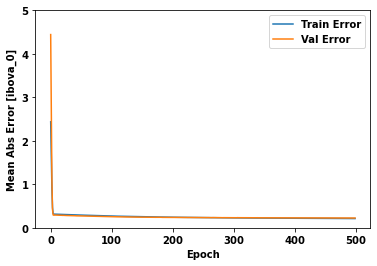

findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


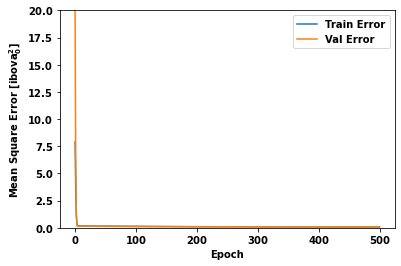

In [16]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [ibova_0]')
  plt.plot(hist['epoch'], hist['mae'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$ibova_0^2$]')
  plt.plot(hist['epoch'], hist['mse'],label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Epoch 1/500
36/36 [==============================] - 2s 47ms/step - loss: 0.7340 - mae: 0.7097 - mse: 0.7340 - val_loss: 1.5534 - val_mae: 1.1581 - val_mse: 1.5534
Epoch 2/500
36/36 [==============================] - 0s 4ms/step - loss: 0.4998 - mae: 0.5765 - mse: 0.4998 - val_loss: 0.9189 - val_mae: 0.8562 - val_mse: 0.9189
Epoch 3/500
36/36 [==============================] - 0s 4ms/step - loss: 0.3495 - mae: 0.4746 - mse: 0.3495 - val_loss: 0.5429 - val_mae: 0.6279 - val_mse: 0.5429
Epoch 4/500
36/36 [==============================] - 0s 4ms/step - loss: 0.2620 - mae: 0.4067 - mse: 0.2620 - val_loss: 0.3498 - val_mae: 0.4918 - val_mse: 0.3498
Epoch 5/500
36/36 [==============================] - 0s 3ms/step - loss: 0.2180 - mae: 0.3683 - mse: 0.2180 - val_loss: 0.2656 - val_mae: 0.4194 - val_mse: 0.2656
Epoch 6/500
36/36 [==============================] - 0s 3ms/step - loss: 0.1980 - mae: 0.3502 - mse: 0.1980 - val_loss: 0.2414 - val_mae: 0.3935 - val_mse: 0.2414
Epoch 7/500
36/36 [==

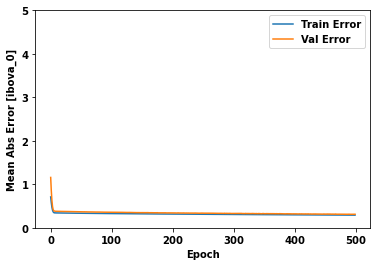

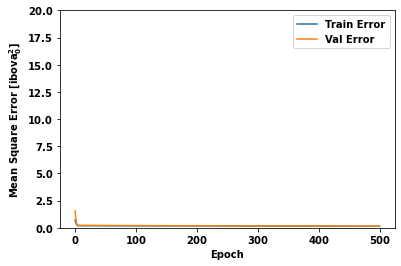

In [17]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(
  monitor='val_mse', patience=50, mode='min' ,restore_best_weights=True)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop, tensorboard_callback])

# Mudar os dados de validação

plot_history(history)

In [18]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print(f"Testing set Mean Abs Error: {mse:5.2f} ibova_0")

15/15 - 0s - loss: 0.3879 - mae: 0.3426 - mse: 0.3879
Testing set Mean Abs Error:  0.39 ibova_0


# Realizando as previsões

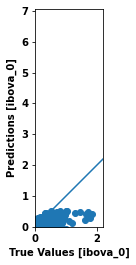

In [19]:
test_predictions = model.predict(test_dataset).flatten()
plt.figure(figsize=(24,4))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [ibova_0]')
plt.ylabel('Predictions [ibova_0]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

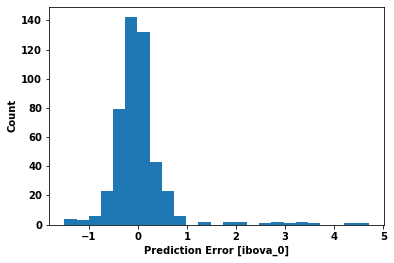

In [20]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [ibova_0]")
_ = plt.ylabel("Count")

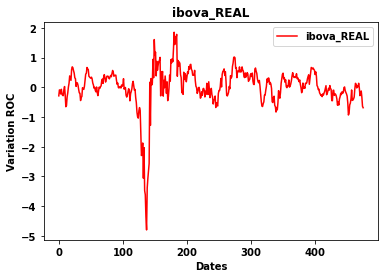

In [21]:
# Imprimindo valores reais
ibova_test = test_labels
plt.plot(ibova_test, color ='r', label='ibova_REAL')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("ibova_REAL")
plt.legend()

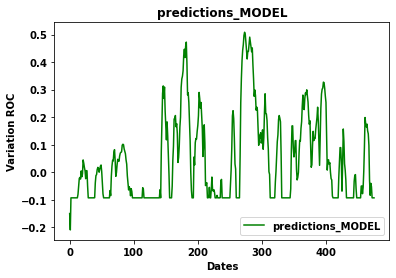

In [22]:
# Imprimindo previsoes
plt.plot(test_predictions, color ='g', label='predictions_MODEL')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("predictions_MODEL")
plt.legend()


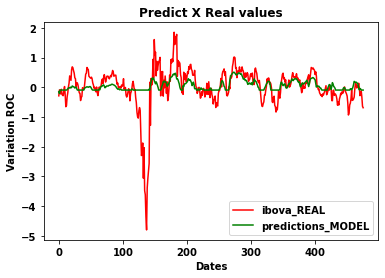

In [23]:
# Predictt X Real values
plt.plot(ibova_test, color ='r', label='ibova_REAL')
plt.plot(test_predictions, color ='g', label='predictions_MODEL')
plt.xlabel("Dates")
plt.ylabel("Variation ROC")
plt.title("Predict X Real values")
plt.legend()
plt.show()

In [24]:
# Analisando Medias:

print(f'Massa de predição: {test_predictions.mean()}')
print(f'Massa inicial: {ibova_test.mean()}')
print(f'Diferenças das médias: {ibova_test.mean() - test_predictions.mean()}')

Massa de predição: 0.04456407204270363
Massa inicial: 0.014602090989644002
Diferenças das médias: -0.029961981053059625


In [25]:
# test_dataset